Import des données


In [ ]:
from __future__ import division, print_function, unicode_literals

# imports
import numpy as np
import os
import pandas as pd

# stabilité du notebook d'une exécution à l'autre
np.random.seed(42)

# ignorer les warnings inutiles (voir SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

url = 'https://raw.githubusercontent.com/HugoLeBoennec/A4_Intelligence_Artificielle/main/Projet/'

general_data = pd.read_csv(url + "dataset/general_data.csv", error_bad_lines=False)
employee_survey_data = pd.read_csv(url + "dataset/employee_survey_data.csv", error_bad_lines=False)
manager_survey_data = pd.read_csv(url + "dataset/manager_survey_data.csv", error_bad_lines=False)
out_time = pd.read_csv(url + "dataset/out_time.csv", error_bad_lines=False)
in_time = pd.read_csv(url + "dataset/in_time.csv", error_bad_lines=False)
employee_survey_data

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0
...,...,...,...,...
4405,4406,4.0,1.0,3.0
4406,4407,4.0,4.0,3.0
4407,4408,1.0,3.0,3.0
4408,4409,4.0,1.0,3.0


Fusion des tableaux

In [ ]:
alldata = pd.merge(general_data, employee_survey_data)
alldata

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,Research Scientist,Single,60290,3.0,Y,17,8,1,10.0,5,3,0,2,4.0,1.0,3.0
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,Y,15,8,0,10.0,2,3,0,2,4.0,4.0,3.0
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,Sales Executive,Married,37020,0.0,Y,20,8,0,5.0,4,4,1,2,1.0,3.0,3.0
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,1,Laboratory Technician,Divorced,23980,0.0,Y,14,8,1,10.0,2,9,7,8,4.0,1.0,3.0


Affichage des données

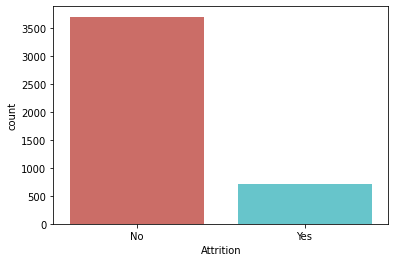

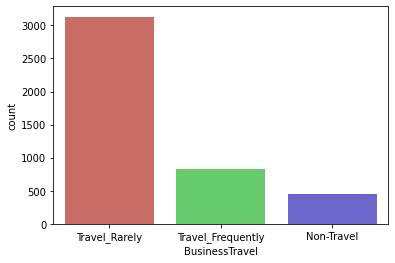

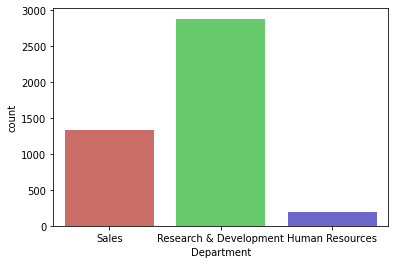

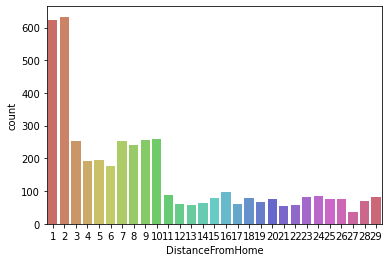

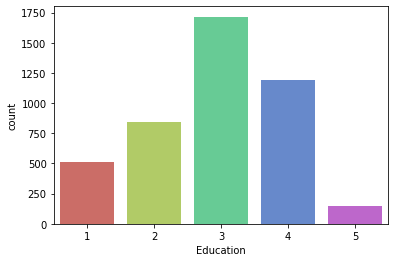

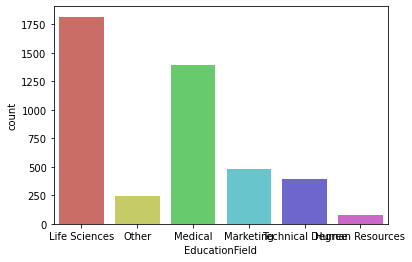

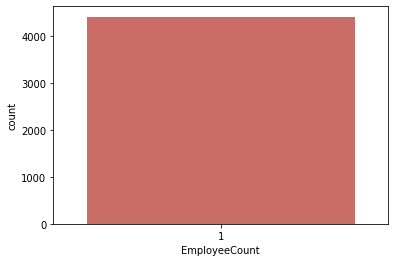

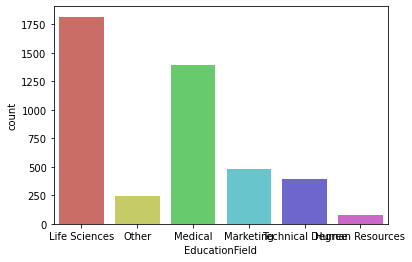

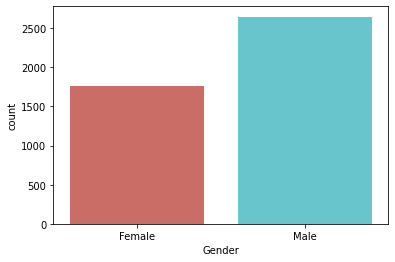

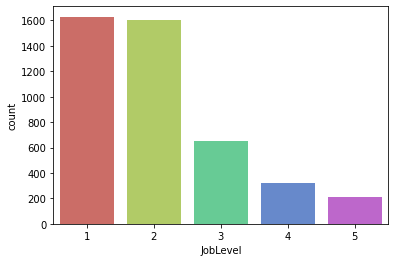

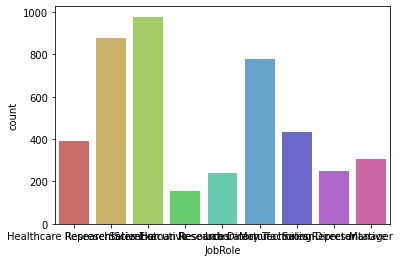

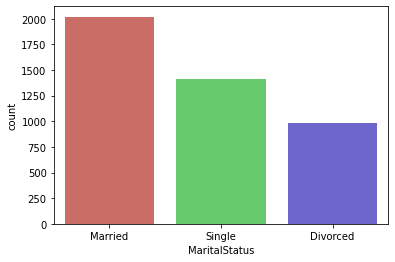

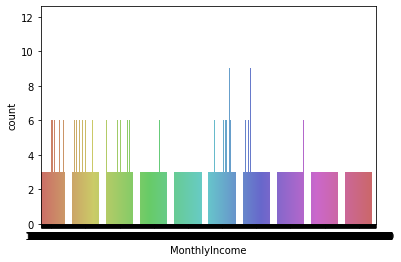

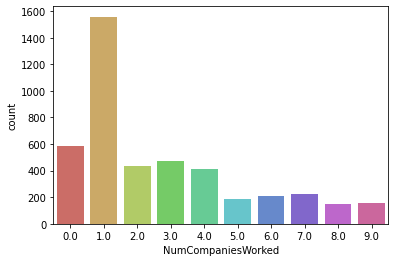

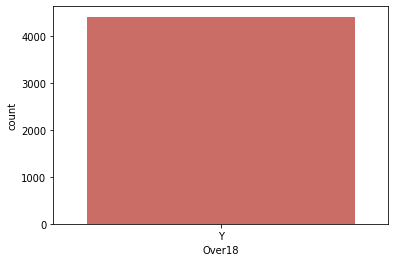

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=alldata.Attrition, data= alldata, palette='hls')
plt.show()
sns.countplot(x=alldata.BusinessTravel, data= alldata, palette='hls')
plt.show()
sns.countplot(x=alldata.Department, data= alldata, palette='hls')
plt.show()
sns.countplot(x=alldata.DistanceFromHome, data= alldata, palette='hls')
plt.show()
sns.countplot(x=alldata.Education, data= alldata, palette='hls')
plt.show()
sns.countplot(x=alldata.EducationField, data= alldata, palette='hls')
plt.show()
sns.countplot(x=alldata.EmployeeCount, data= alldata, palette='hls')
plt.show()
sns.countplot(x=alldata.EducationField, data= alldata, palette='hls')
plt.show()
sns.countplot(x=alldata.Gender, data= alldata, palette='hls')
plt.show()
sns.countplot(x=alldata.JobLevel, data= alldata, palette='hls')
plt.show()
sns.countplot(x=alldata.JobRole, data= alldata, palette='hls')
plt.show()
sns.countplot(x=alldata.MaritalStatus, data= alldata, palette='hls')
plt.show()
sns.countplot(x=alldata.MonthlyIncome, data= alldata, palette='hls')
plt.show()
sns.countplot(x=alldata.NumCompaniesWorked, data= alldata, palette='hls')
plt.show()
sns.countplot(x=alldata.Over18, data= alldata, palette='hls')
plt.show()

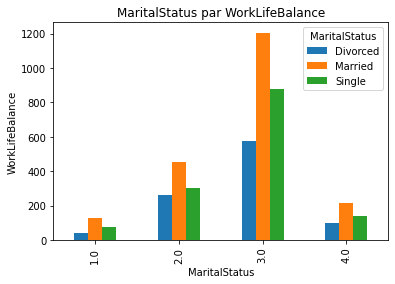

In [ ]:
pd.crosstab(alldata.WorkLifeBalance,alldata.MaritalStatus).plot(kind='bar')
plt.title('MaritalStatus par WorkLifeBalance')
plt.xlabel('MaritalStatus')
plt.ylabel('WorkLifeBalance')
plt.show()

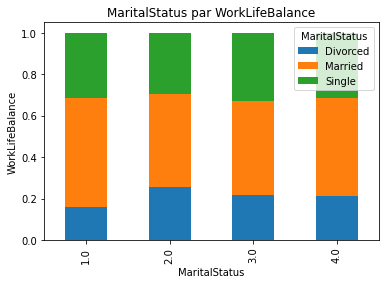

In [ ]:
table1 = pd.crosstab(alldata.WorkLifeBalance, alldata.MaritalStatus)
table1.div(table1.sum(1).astype(float), axis=0).plot(kind='bar', stacked = True)
plt.title('MaritalStatus par WorkLifeBalance')
plt.xlabel('MaritalStatus')
plt.ylabel('WorkLifeBalance')
plt.show()

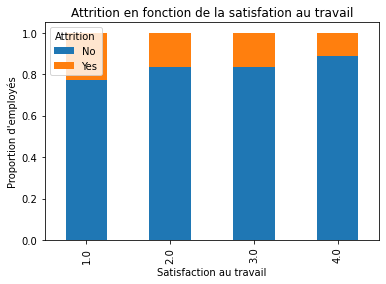

In [ ]:
table2 = pd.crosstab(alldata.JobSatisfaction, alldata.Attrition)
table2.div(table2.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Attrition en fonction de la satisfation au travail")
plt.xlabel("Satisfaction au travail")
plt.ylabel("Proportion d'employés")
plt.show()

suppression des nan

In [ ]:
copy_alldata = alldata
copy_alldata.dropna(inplace = True)
copy_alldata.isnull().sum().sort_values(ascending=False).head()

WorkLifeBalance    0
MaritalStatus      0
Attrition          0
BusinessTravel     0
Department         0
dtype: int64

remplacement des variables qualitatives en quantitative

In [ ]:
#Change Attrition column values to numeric values
attrition={'Yes':1, 'No':0}
Gender={'Female':1, 'Male':0}
MaritalStatus={'Divorced':2, 'Married':1, 'Single':0 }
Department={ 'Research & Development':2, 'Human Resources':1, 'Sales':0 }
BusinessTravel={ 'Travel_Rarely':0, 'Travel_Frequently':1, 'Non-Travel':2}
EducationField={ 'Life Sciences':0, 'Other':1, 'Medical':2, 'Marketing':3, 'Technical Degree':4, 'Human Resources':5}
JobRole={ 'Healthcare Representative':0, 'Research Scientist':1, 'Sales Executive':2, 'Human Resources':3, 'Research Director':4, 'Laboratory Technician':5, 'Manufacturing Director':6, 'Sales Representative': 7, 'Manager':8}
#raw_data.Attrition=[attrition[item] for item in raw_data.Attrition]
copy_alldata.Attrition=copy_alldata.Attrition.map(lambda x:attrition[x])
copy_alldata.EducationField=copy_alldata.EducationField.map(lambda x:EducationField[x])
copy_alldata.Gender=copy_alldata.Gender.map(lambda x:Gender[x])
copy_alldata.MaritalStatus=copy_alldata.MaritalStatus.map(lambda x:MaritalStatus[x])
copy_alldata.Department=copy_alldata.Department.map(lambda x:Department[x])
copy_alldata.BusinessTravel=copy_alldata.BusinessTravel.map(lambda x:BusinessTravel[x])
copy_alldata.JobRole=copy_alldata.JobRole.map(lambda x:JobRole[x])

print(copy_alldata)

      Age  Attrition  ...  JobSatisfaction  WorkLifeBalance
0      51          0  ...              4.0              2.0
1      31          1  ...              2.0              4.0
2      32          0  ...              2.0              1.0
3      38          0  ...              4.0              3.0
4      32          0  ...              1.0              3.0
...   ...        ...  ...              ...              ...
4404   29          0  ...              4.0              3.0
4405   42          0  ...              1.0              3.0
4406   29          0  ...              4.0              3.0
4407   25          0  ...              3.0              3.0
4408   42          0  ...              1.0              3.0

[4300 rows x 27 columns]


calcule des corélations

In [ ]:
corr_features=copy_alldata.corr()
corr_features.iloc[:,1]

Age                       -0.155584
Attrition                  1.000000
BusinessTravel            -0.001888
Department                 0.001769
DistanceFromHome          -0.008314
Education                 -0.015237
EducationField             0.004614
EmployeeCount                   NaN
EmployeeID                -0.001707
Gender                    -0.018624
JobLevel                  -0.014587
JobRole                   -0.034162
MaritalStatus             -0.161126
MonthlyIncome             -0.032629
NumCompaniesWorked         0.043911
PercentSalaryHike          0.034425
StandardHours                   NaN
StockOptionLevel          -0.007971
TotalWorkingYears         -0.168637
TrainingTimesLastYear     -0.046239
YearsAtCompany            -0.133612
YearsSinceLastPromotion   -0.029931
YearsWithCurrManager      -0.155420
EnvironmentSatisfaction   -0.103485
JobSatisfaction           -0.103098
WorkLifeBalance           -0.059817
Name: Attrition, dtype: float64

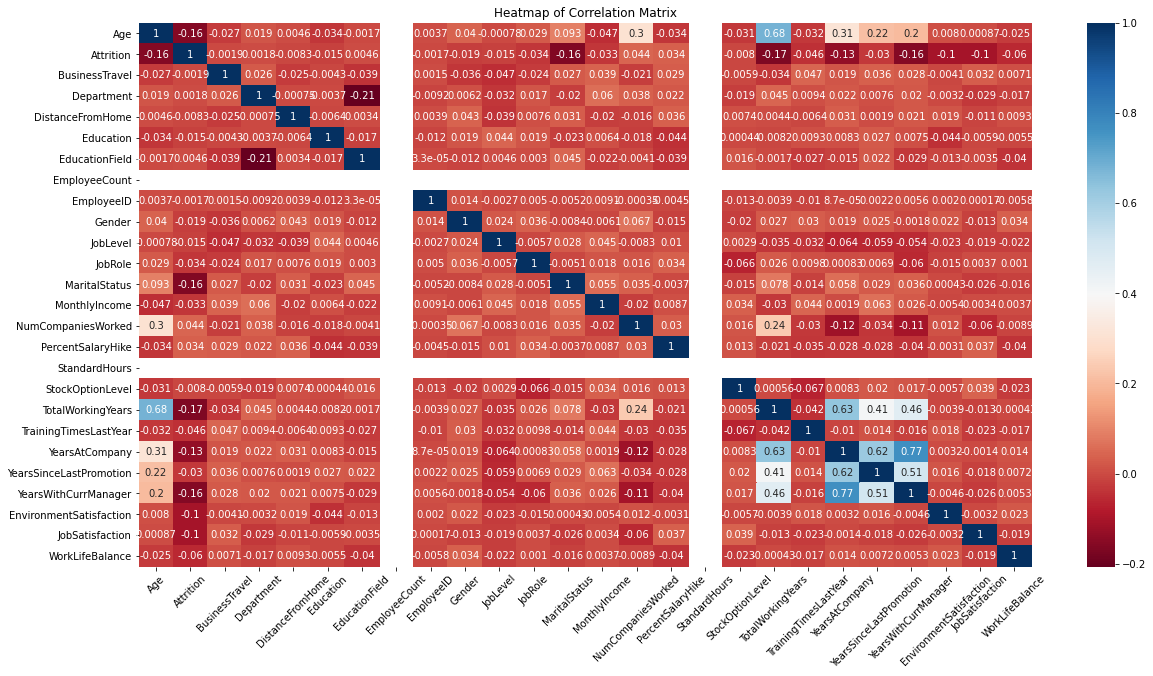

In [ ]:
 def Heat_map(data, features):
    plt.figure(figsize=(20, 10))
    sns.heatmap(data[features].corr(), cmap='RdBu', annot=True)
    plt.xticks(rotation=45) 
    plt.title('Heatmap of Correlation Matrix')

Heat_map(copy_alldata,list(copy_alldata.columns))

application d'un model

In [ ]:
X, y = copy_alldata.loc[:, copy_alldata.columns !="Attrition"], copy_alldata.loc[:, "Attrition"]
X = pd.get_dummies(X, drop_first= True)
X.head()
y = pd.get_dummies(y, drop_first= True)
y.head()

,1
0,0
1,1
2,0
3,0
4,0


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_new = SelectKBest(chi2, k="all").fit_transform(X,y)
SelectKBest(chi2, k="all").fit(X,y).get_support(indices=True)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [ ]:
y = np.ravel(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[890,   8],
       [155,  22]])

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 100)
accuracies.mean()

0.8527935606060606

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = {"C": np.arange(0.3,0.4,0.01),
        "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
        "max_iter": [200]
       }

classifier_opt = GridSearchCV(classifier, grid, scoring = 'accuracy', cv=10)
classifier_opt.fit(X_train,y_train)
print("Tuned_parameter k : {}".format(classifier_opt.best_params_))
print("Best Score: {}".format(classifier_opt.best_score_))

Tuned_parameter k : {'C': 0.3, 'max_iter': 200, 'solver': 'newton-cg'}
Best Score: 0.8533296155990999


In [ ]:
classifier = LogisticRegression(C=0.35000000000000003, solver="newton-cg", max_iter=200)
classifier.fit(X_train, y_train)

accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.8533296155990999

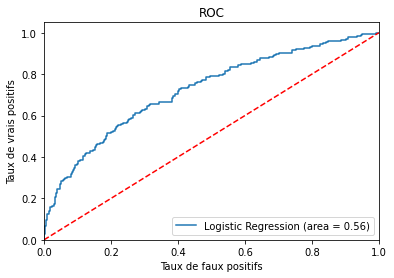

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()